In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


<p style="color:#ff0800">
<b style="background:#f6ff00">
Загрузи нужный файл в формате .csv            
</b>
</p>   

In [2]:
dfm = pd.read_csv('ab.csv')
dfm

,user_id,id_group,ad_date,purchase_date,promo_type,time_left
0,5061,1,2021-02-06,NaN,Gold Bundle,2020-08-23
1,4616,1,2021-03-07,2021-03-20,Platinum Bundle,2020-12-26
2,842,1,2021-04-13,2021-05-28,Platinum Bundle,2021-01-02
3,3571,1,2021-04-01,2021-05-10,Bundle Limited,2020-10-21
4,4642,1,2021-08-18,NaN,Platinum Bundle,2021-06-08
...,...,...,...,...,...,...
15166,11750,0,2021-03-15,2021-04-12,Platinum Bundle,2020-10-11
15167,106,1,2021-01-11,2021-02-25,Gold Bundle,2020-09-30
15168,3706,1,2021-05-11,2021-07-08,Gold Bundle,2021-03-16
15169,11753,1,2021-02-28,NaN,Std Bundle,2020-12-23




<p style="color:#ff0800">
<b style="background:#f6ff00">
      приводим столбцы к формату даты                   
</b>
</p>  
    

In [3]:
dfm['ad_date'] = pd.to_datetime(dfm['ad_date'])
dfm['purchase_date'] = pd.to_datetime(dfm['purchase_date'])
dfm['time_left'] = pd.to_datetime(dfm['time_left'])

<p style="color:000000">
<b style="background:#00ffee">
      проверяем                  
</b>
</p>  
    

In [4]:
#рассчитываем сколько дней прошло с момента оправки смс/пуш до момента покупки
dfm['x'] = dfm['purchase_date'] - dfm['ad_date']
#извлекаем компонент дни(приводим к цифрам)
dfm['x']=(dfm['x']).dt.components['days']
#заменяем нулл на 0
dfm['x'] = dfm['x'].fillna(0)

<p style="color:000000">
<b style="background:#00ffee">
создаю новую таблицу для проверки максимального количества дней 
</b>
</p>

In [5]:
#создаем таблицу без нуловых x 
dfmx = dfm[dfm['x']>0]
#проверка максимального и минимального количества дней в столбце x (кол-во дней с момента оправки смс/пуш до момента покупки)
maxx = max(dfmx['x'])
minx = min(dfmx['x'])
print ('Максимальное кол-во дней в столбце х:', int(maxx))
print ('Минимальное кол-во дней в столбце х:',int(minx))

Максимальное кол-во дней в столбце х: 70
Минимальное кол-во дней в столбце х: 1


<p style="color:#ff0800">
<b style="background:#f6ff00">
      новые столбцы забинированные по количеству дней  (для ретеншн)                 
</b>
</p>  

In [6]:
dfm['fl_30'] = ((dfm['x'] > 1) & (dfm['x']<=30)).astype(int)
dfm['fl_60'] = ((dfm['x'] > 1) &  (dfm['x']<=60)).astype(int)
dfm['fl_90'] = ((dfm['x'] > 1) &  (dfm['x']<=90)).astype(int)
dfm.head(10)

,user_id,id_group,ad_date,purchase_date,promo_type,time_left,x,fl_30,fl_60,fl_90
0,5061,1,2021-02-06,NaT,Gold Bundle,2020-08-23,0.0,0,0,0
1,4616,1,2021-03-07,2021-03-20,Platinum Bundle,2020-12-26,13.0,1,1,1
2,842,1,2021-04-13,2021-05-28,Platinum Bundle,2021-01-02,45.0,0,1,1
3,3571,1,2021-04-01,2021-05-10,Bundle Limited,2020-10-21,39.0,0,1,1
4,4642,1,2021-08-18,NaT,Platinum Bundle,2021-06-08,0.0,0,0,0
5,370,0,2021-02-01,2021-03-23,Std Bundle,2020-09-20,50.0,0,1,1
6,4466,1,2021-04-28,2021-05-27,Platinum Bundle,2021-01-20,29.0,1,1,1
7,2692,1,2021-05-01,2021-06-11,Platinum Bundle,2021-01-17,41.0,0,1,1
8,3891,1,2021-04-13,2021-05-27,Platinum Bundle,2020-12-08,44.0,0,1,1
9,608,1,2021-07-06,NaT,Std Bundle,2021-04-22,0.0,0,0,0


<p style="color:#ff0800">
<b style="background:#f6ff00">
      формула                 
</b>
</p>

In [7]:
dfm_gr = dfm.groupby(['promo_type','id_group']).agg({'user_id':'count'
                                                
                                                , 'fl_30': 'sum'
                                                , 'fl_60': 'sum'
                                                , 'fl_90': 'sum'
                                                    }).reset_index()
dfm_gr['ratio_30'] = dfm_gr['fl_30'] / dfm_gr['user_id']*100
dfm_gr['ratio_60'] = dfm_gr['fl_60'] / dfm_gr['user_id']*100
dfm_gr['ratio_90'] = dfm_gr['fl_90'] / dfm_gr['user_id']*100
dfm_gr=dfm_gr.round(2)

<p style="color:#ff0800">
<b style="background:#f6ff00">
      переименовываю столбцы                 
</b>
</p>

In [8]:
dfm_gr.rename(columns = {'promo_type' : 'Рекламная акция', 'id_group' : 'пуш(0)/смс(1)', 'user_id' : 'всего', 'ratio_30' : 'к 30 дню', 'ratio_60' : 'к 60 дню', 'ratio_90' : 'к 90 дню', 'fl_30' : 'к30 дню', 'fl_60' : 'к60 дню', 'fl_90' : 'к90 дню'}, inplace = True)
dfm_gr

,Рекламная акция,пуш(0)/смс(1),всего,к30 дню,к60 дню,к90 дню,к 30 дню,к 60 дню,к 90 дню
0,Bundle Limited,0,1134,339,732,811,29.89,64.55,71.52
1,Bundle Limited,1,1112,332,697,776,29.86,62.68,69.78
2,Gold Bundle,0,1894,537,1339,1457,28.35,70.70,76.93
3,Gold Bundle,1,1846,620,1496,1702,33.59,81.04,92.20
4,Platinum Bundle,0,1804,670,1271,1378,37.14,70.45,76.39
5,Platinum Bundle,1,1811,615,1331,1449,33.96,73.50,80.01
6,Std Bundle,0,2753,452,904,993,16.42,32.84,36.07
7,Std Bundle,1,2817,407,829,915,14.45,29.43,32.48


<p style="color:#ff0800">
<b style="background:#f6ff00">
      переделываю таблицу для последующего построения графика                 
</b>
</p>

In [9]:
dfb= dfm_gr
#привожу столбцы рекл.акция и пуш(0)/смс(1) к формату строки
dfm_gr['пуш(0)/смс(1)'] = dfm_gr['пуш(0)/смс(1)'].astype(str)
dfm_gr['Рекламная акция'] = dfm_gr['Рекламная акция'].astype(str)
#склеиваю их значения в отдельный столбец
dfb['РА'] = dfb['Рекламная акция'] +' '+ dfb['пуш(0)/смс(1)']
dfb

,Рекламная акция,пуш(0)/смс(1),всего,к30 дню,к60 дню,к90 дню,к 30 дню,к 60 дню,к 90 дню,РА
0,Bundle Limited,0,1134,339,732,811,29.89,64.55,71.52,Bundle Limited 0
1,Bundle Limited,1,1112,332,697,776,29.86,62.68,69.78,Bundle Limited 1
2,Gold Bundle,0,1894,537,1339,1457,28.35,70.70,76.93,Gold Bundle 0
3,Gold Bundle,1,1846,620,1496,1702,33.59,81.04,92.20,Gold Bundle 1
4,Platinum Bundle,0,1804,670,1271,1378,37.14,70.45,76.39,Platinum Bundle 0
5,Platinum Bundle,1,1811,615,1331,1449,33.96,73.50,80.01,Platinum Bundle 1
6,Std Bundle,0,2753,452,904,993,16.42,32.84,36.07,Std Bundle 0
7,Std Bundle,1,2817,407,829,915,14.45,29.43,32.48,Std Bundle 1


In [10]:
#создаю новую транспонированную таблицу
new = dfb.T
#назначаю индексированной строкой строку "РА"
new.columns=new.iloc[9]
#убираю лишние строки
new2=new.iloc[6:9,:]
new2

РА,Bundle Limited 0,Bundle Limited 1,Gold Bundle 0,Gold Bundle 1,Platinum Bundle 0,Platinum Bundle 1,Std Bundle 0,Std Bundle 1
к 30 дню,29.89,29.86,28.35,33.59,37.14,33.96,16.42,14.45
к 60 дню,64.55,62.68,70.7,81.04,70.45,73.5,32.84,29.43
к 90 дню,71.52,69.78,76.93,92.2,76.39,80.01,36.07,32.48


<p style="color:#ff0800">
<b style="background:#f6ff00">
      строю график                 
</b>
</p>

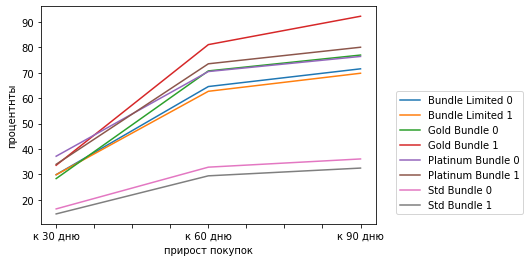

In [13]:
#строит график
new2.plot(  )

#добавляем подписи осей
plt.xlabel('прирост покупок')
plt.ylabel('процентнты')

#меняю расположение легенды
plt.legend(loc=8, bbox_to_anchor=(1.25,0.02));

